<a href="https://colab.research.google.com/github/BetoRdz01/Valores-Atipicos/blob/main/Act3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad 3.2: Valores Atípicos por Dataframe**
Alberto Rodríguez Porras | A01721497


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
gc0 = pd.read_csv('gastos_costos_2020.csv')
gc1 = pd.read_csv('gastos_costos_2021.csv')
gc2 = pd.read_csv('gastos_costos_2022.csv')
gc3 = pd.read_csv('gastos_costos_2023.csv')

In [57]:
gc0.head()

,Unnamed: 0,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,Columna1
0,0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,0,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,-,0,2248.28,16300,2248.28,Vigente,14051.72
1,1,2020-01-01,1010100750847110016,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,0,COMISION COBRADA,1.0,490.00,78.40,-,-,568.4,568.4,78.40,Vigente,0.00
2,2,2020-01-01,1010100752163709952,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,0,COMISION COBRADA,1.0,195.00,31.20,-,-,226.2,226.2,31.20,Vigente,0.00
3,3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,0,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,-,-,12405.33,12405.33,1711.08,Vigente,0.00
4,4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,0,Pago,1.0,0.00,0.00,-,-,-,-,0.00,Vigente,0.00


In [58]:
gc0.isnull().sum()

Unnamed: 0     0
FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
Columna1       0
dtype: int64

Todos los archivos ya están limpios de datyos nulos tras la limpieza realizada en la actividad pasada. 

## **Datos Atípicos**

## Año 2020

In [59]:
gc0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3342 non-null   int64  
 1   FECHA        3342 non-null   object 
 2   FOLIO        3342 non-null   object 
 3   UUID         3342 non-null   object 
 4   RFC          3342 non-null   object 
 5   PROVEEDOR    3342 non-null   object 
 6   TIPO GASTO   3342 non-null   object 
 7   GASTO        3342 non-null   object 
 8   DESCRIPCION  3342 non-null   object 
 9   TC           3342 non-null   float64
 10  IMPORTE      3342 non-null   float64
 11  IVA          3342 non-null   float64
 12  RET ISR      3342 non-null   object 
 13  RET IVA      3342 non-null   object 
 14  TOTAL MX     3342 non-null   object 
 15  TOTAL SAT    3342 non-null   object 
 16  TIPO         3342 non-null   float64
 17  STATUS       3342 non-null   object 
 18  Columna1     3342 non-null   float64
dtypes: flo

In [60]:
#Columnas numéricas
X0=gc0.iloc[:,[9,10,11,16,18]]

#Columnas objeto
y0=gc0.iloc[:,[1,2,3,4,5,6,7,8,12,13,14,15,17]]
X0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TC        3342 non-null   float64
 1   IMPORTE   3342 non-null   float64
 2   IVA       3342 non-null   float64
 3   TIPO      3342 non-null   float64
 4   Columna1  3342 non-null   float64
dtypes: float64(5)
memory usage: 130.7 KB


<Figure size 1500x800 with 0 Axes>

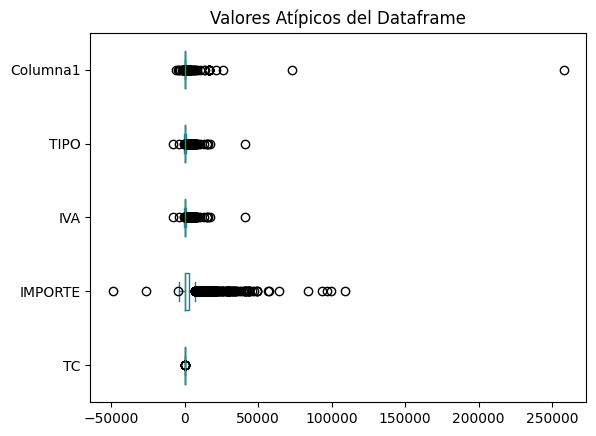

In [61]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
X0.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**Proceso de desviación estándar**

In [62]:
y=X0
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
outliers= X0[(y>Limite_Superior)|(y<Limite_Inferior)]
#Outliers como nulos
X0_n= X0[(y<=Limite_Superior)&(y>=Limite_Inferior)]
X0_n.isnull().sum()

TC           9
IMPORTE     67
IVA         59
TIPO        59
Columna1    15
dtype: int64

In [63]:
#Cambiamos los datos nulos (antes atípicos) por media
X0_clean=X0_n.copy()
X0_clean=X0_clean.fillna(round(X0_n.mean(),1))
X0_clean.isnull().sum()

TC          0
IMPORTE     0
IVA         0
TIPO        0
Columna1    0
dtype: int64

In [97]:
Datos_limpios0d = pd.concat([y0, X0_clean], axis=1)
Datos_limpios0d.to_csv('gastos_costos_2020_nulos_outliers_de.csv')
Datos_limpios0d

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,STATUS,TC,IMPORTE,IVA,TIPO,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,0,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",-,0,2248.28,16300,Vigente,1.0,0.00,2248.28,2248.28,14051.72
1,2020-01-01,1010100750847110016,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,0,COMISION COBRADA,-,-,568.4,568.4,Vigente,1.0,490.00,78.40,78.40,0.00
2,2020-01-01,1010100752163709952,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,0,COMISION COBRADA,-,-,226.2,226.2,Vigente,1.0,195.00,31.20,31.20,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,0,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,-,-,12405.33,12405.33,Vigente,1.0,10694.25,1711.08,1711.08,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,0,Pago,-,-,-,-,Vigente,1.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,-,-,150,150,Vigente,1.0,129.79,20.21,20.21,0.00
3338,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,-,-,2650.37,2650.37,Vigente,1.0,2284.80,365.57,365.57,0.00
3339,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,-,-,190,190,Vigente,1.0,163.79,26.21,26.21,0.00
3340,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,-,-,-,-,Vigente,1.0,0.00,0.00,0.00,0.00


**Proceso intercuartílico**

In [64]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=X0
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25
Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
outliers_iqr= X0[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
#Obtenemos datos limpios del Dataframe
X0_iqr= X0[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
X0_iqr.isnull().sum()

TC            9
IMPORTE     423
IVA         445
TIPO        445
Columna1    240
dtype: int64

In [65]:
#Reemplazamos valores nulos (atípicos) con la media
X0_iqr2=X0_iqr.copy()
X0_iqr2=X0_iqr2.fillna(round(X0_iqr.mean(),1))
X0_iqr2.isnull().sum()

TC          0
IMPORTE     0
IVA         0
TIPO        0
Columna1    0
dtype: int64

In [76]:
Datos_limpios0 = pd.concat([y0, X0_iqr2], axis=1)
Datos_limpios0.to_csv('gastos_costos_2020_nulos_outliers.csv')
Datos_limpios0

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,STATUS,TC,IMPORTE,IVA,TIPO,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,0,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",-,0,2248.28,16300,Vigente,1.0,0.00,144.90,144.90,0.0
1,2020-01-01,1010100750847110016,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,0,COMISION COBRADA,-,-,568.4,568.4,Vigente,1.0,490.00,78.40,78.40,0.0
2,2020-01-01,1010100752163709952,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,0,COMISION COBRADA,-,-,226.2,226.2,Vigente,1.0,195.00,31.20,31.20,0.0
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,0,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,-,-,12405.33,12405.33,Vigente,1.0,1078.30,144.90,144.90,0.0
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,0,Pago,-,-,-,-,Vigente,1.0,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,-,-,150,150,Vigente,1.0,129.79,20.21,20.21,0.0
3338,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,-,-,2650.37,2650.37,Vigente,1.0,2284.80,365.57,365.57,0.0
3339,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,-,-,190,190,Vigente,1.0,163.79,26.21,26.21,0.0
3340,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,-,-,-,-,Vigente,1.0,0.00,0.00,0.00,0.0


<Figure size 1500x800 with 0 Axes>

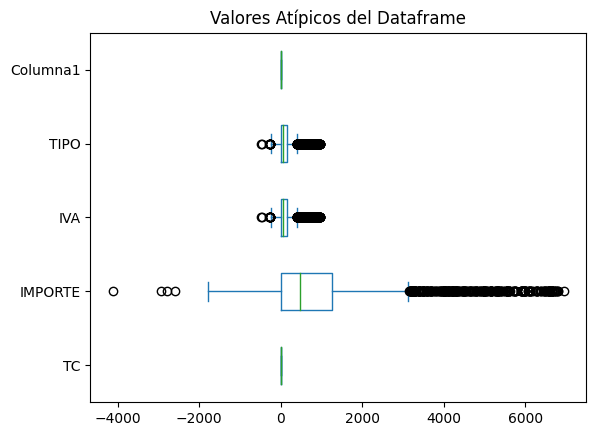

In [67]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Datos_limpios0.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

## Año 2021

In [68]:
gc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1501 non-null   int64  
 1   FECHA       1501 non-null   object 
 2   TIPO GASTO  1501 non-null   object 
 3   TC          1501 non-null   float64
 4   TOTAL SAT   1501 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 58.8+ KB


In [69]:
#Columnas numéricas
X1=gc1.iloc[:,[3,4]]

#Columnas objeto
y1=gc1.iloc[:,[1,2]]

<Figure size 1500x800 with 0 Axes>

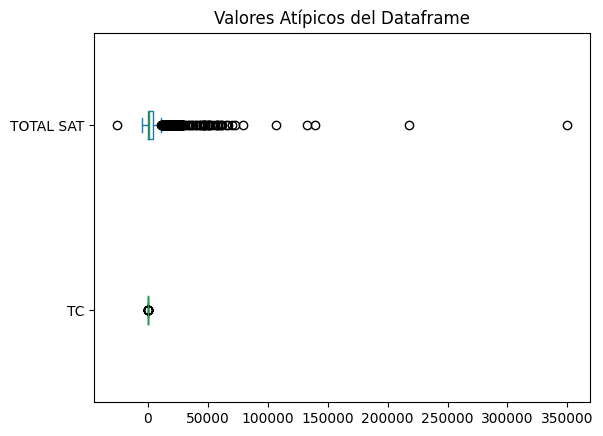

In [70]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
X1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

**Proceso de desviación estándar**

In [71]:
y=X1
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
outliers= X1[(y>Limite_Superior)|(y<Limite_Inferior)]
#Outliers como nulos
X1_n= X1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
X1_n.isnull().sum()

TC           16
TOTAL SAT    18
dtype: int64

In [72]:
#Cambiamos los datos nulos (antes atípicos) por media
X1_clean=X1_n.copy()
X1_clean=X1_clean.fillna(round(X1_n.mean(),1))
X1_clean.isnull().sum()

TC           0
TOTAL SAT    0
dtype: int64

In [98]:
Datos_limpios1d = pd.concat([y1, X1_clean], axis=1)
Datos_limpios1d.to_csv('gastos_costos_2021_nulos_outliers_de.csv')
Datos_limpios1d

,FECHA,TIPO GASTO,TC,TOTAL SAT
0,2021-01-01,COMISION BANCARIA,1.0,568.40
1,2021-01-01,COMISION BANCARIA,1.0,400.20
2,2021-01-01,ARRENDAMIENTO FINANCIERO,1.0,6439.60
3,2021-01-01,ARRENDAMIENTO FINANCIERO,1.0,6440.30
4,2021-01-01,NO DEDUCIBLE,1.0,599.00
...,...,...,...,...
1496,2021-12-01,PUBLICIDAD,1.0,0.00
1497,2021-12-01,PUBLICIDAD,1.0,0.00
1498,2021-12-01,COMISION BANCARIA,1.0,23532.04
1499,2021-12-01,COMISION BANCARIA,1.0,0.00


**Proceso intercuartílico**

In [73]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=X1
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25
Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
outliers_iqr= X1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
#Obtenemos datos limpios del Dataframe
X1_iqr= X1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
X1_iqr.isnull().sum()

TC            16
TOTAL SAT    229
dtype: int64

In [74]:
#Reemplazamos valores nulos (atípicos) con la media
X1_iqr2=X1_iqr.copy()
X1_iqr2=X1_iqr2.fillna(round(X1_iqr.mean(),1))
X1_iqr2.isnull().sum()

TC           0
TOTAL SAT    0
dtype: int64

In [77]:
Datos_limpios1 = pd.concat([y1, X1_iqr2], axis=1)
Datos_limpios1.to_csv('gastos_costos_2021_nulos_outliers.csv')
Datos_limpios1

,FECHA,TIPO GASTO,TC,TOTAL SAT
0,2021-01-01,COMISION BANCARIA,1.0,568.4
1,2021-01-01,COMISION BANCARIA,1.0,400.2
2,2021-01-01,ARRENDAMIENTO FINANCIERO,1.0,6439.6
3,2021-01-01,ARRENDAMIENTO FINANCIERO,1.0,6440.3
4,2021-01-01,NO DEDUCIBLE,1.0,599.0
...,...,...,...,...
1496,2021-12-01,PUBLICIDAD,1.0,0.0
1497,2021-12-01,PUBLICIDAD,1.0,0.0
1498,2021-12-01,COMISION BANCARIA,1.0,1528.0
1499,2021-12-01,COMISION BANCARIA,1.0,0.0


<Figure size 1500x800 with 0 Axes>

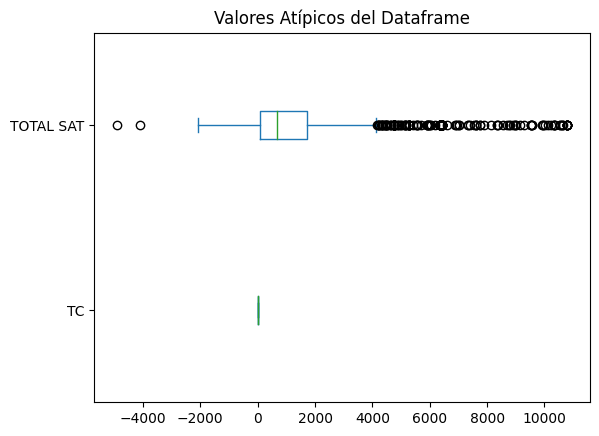

In [78]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Datos_limpios1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

## Año 2022

In [79]:
gc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1361 non-null   int64  
 1   Fecha       1361 non-null   object 
 2   TIPO GASTO  1361 non-null   object 
 3   TC          1361 non-null   float64
 4   TOTAL SAT   1361 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 53.3+ KB


In [80]:
#Columnas numéricas
X2=gc2.iloc[:,[3,4]]

#Columnas objeto
y2=gc2.iloc[:,[1,2]]

<Figure size 1500x800 with 0 Axes>

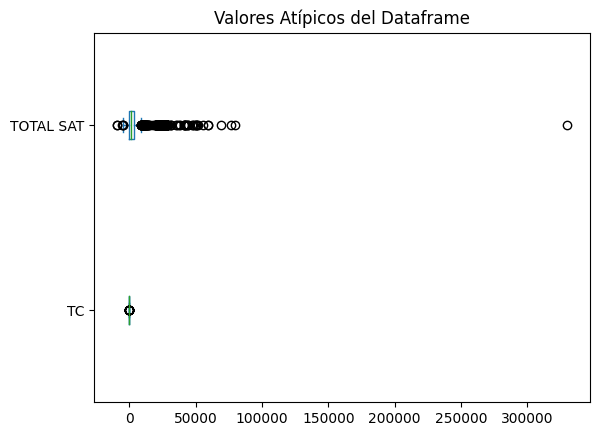

In [81]:
fig = plt.figure(figsize =(15, 8))
X2.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

**Proceso de desviación estándar**

In [82]:
y=X2
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
outliers= X2[(y>Limite_Superior)|(y<Limite_Inferior)]
#Outliers como nulos
X2_n= X2[(y<=Limite_Superior)&(y>=Limite_Inferior)]
X2_n.isnull().sum()

TC           15
TOTAL SAT    18
dtype: int64

In [83]:
#Cambiamos los datos nulos (antes atípicos) por media
X2_clean=X2_n.copy()
X2_clean=X2_clean.fillna(round(X2_n.mean(),1))
X2_clean.isnull().sum()

TC           0
TOTAL SAT    0
dtype: int64

In [99]:
Datos_limpios2d = pd.concat([y2, X2_clean], axis=1)
Datos_limpios2d.to_csv('gastos_costos_2022_nulos_outliers_de.csv')
Datos_limpios2d

,Fecha,TIPO GASTO,TC,TOTAL SAT
0,2022-01-01,ARRENDAMIENTO FINANCIERO,1.0,6439.60
1,2022-01-01,ARRENDAMIENTO FINANCIERO,1.0,6440.30
2,2022-01-01,COMISION BANCARIA,1.0,0.00
3,2022-01-01,MTTO COMPUTO,1.0,417.60
4,2022-01-01,ARRENDAMIENTO FINANCIERO,1.0,0.00
...,...,...,...,...
1356,2022-12-01,PAQUETERIA,1.0,2105.19
1357,2022-12-01,CAPACITACION,1.0,0.00
1358,2022-12-01,GASOLINA,1.0,11449.60
1359,2022-12-01,COMISION BANCARIA,1.0,0.00


**Proceso Intercuartílico**

In [84]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=X2
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25
Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
outliers_iqr= X2[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
#Obtenemos datos limpios del Dataframe
X2_iqr= X2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
X2_iqr.isnull().sum()

TC            15
TOTAL SAT    192
dtype: int64

In [85]:
#Reemplazamos valores nulos (atípicos) con la media
X2_iqr2=X2_iqr.copy()
X2_iqr2=X2_iqr2.fillna(round(X2_iqr.mean(),1))
X2_iqr2.isnull().sum()

TC           0
TOTAL SAT    0
dtype: int64

In [86]:
Datos_limpios2 = pd.concat([y2, X2_iqr2], axis=1)
Datos_limpios2.to_csv('gastos_costos_2022_nulos_outliers.csv')
Datos_limpios2

,Fecha,TIPO GASTO,TC,TOTAL SAT
0,2022-01-01,ARRENDAMIENTO FINANCIERO,1.0,6439.60
1,2022-01-01,ARRENDAMIENTO FINANCIERO,1.0,6440.30
2,2022-01-01,COMISION BANCARIA,1.0,0.00
3,2022-01-01,MTTO COMPUTO,1.0,417.60
4,2022-01-01,ARRENDAMIENTO FINANCIERO,1.0,0.00
...,...,...,...,...
1356,2022-12-01,PAQUETERIA,1.0,2105.19
1357,2022-12-01,CAPACITACION,1.0,0.00
1358,2022-12-01,GASOLINA,1.0,1444.70
1359,2022-12-01,COMISION BANCARIA,1.0,0.00


<Figure size 1500x800 with 0 Axes>

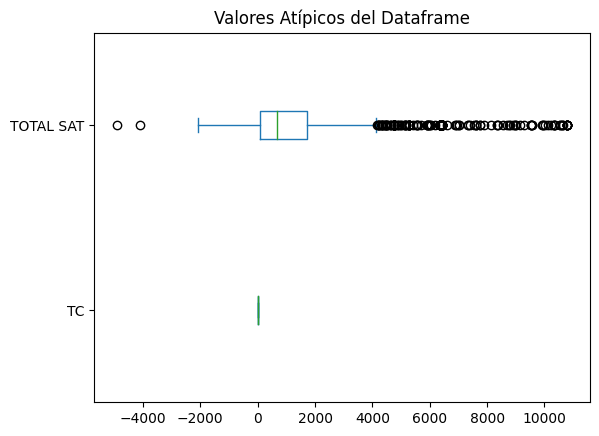

In [87]:
fig = plt.figure(figsize =(15, 8))
Datos_limpios1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

## Año 2023

In [88]:
gc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  192 non-null    int64  
 1   Fecha       192 non-null    object 
 2   TIPO GASTO  192 non-null    object 
 3   TC          192 non-null    float64
 4   TOTAL SAT   192 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.6+ KB


In [89]:
#Columnas numéricas
X3=gc3.iloc[:,[3,4]]

#Columnas objeto
y3=gc3.iloc[:,[1,2]]

<Figure size 1500x800 with 0 Axes>

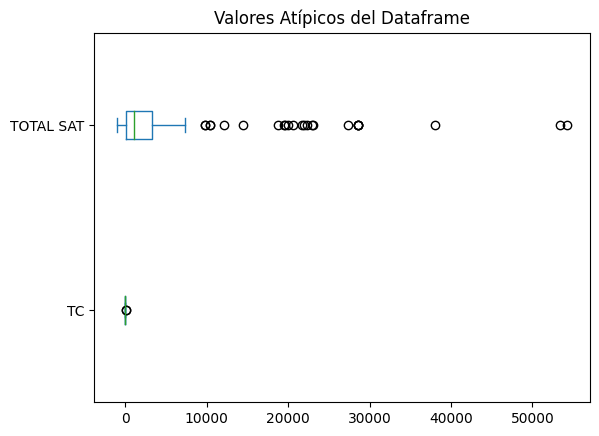

In [90]:
fig = plt.figure(figsize =(15, 8))
X3.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

**Proceso de desviación estándar**

In [91]:
y=X3
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
outliers= X3[(y>Limite_Superior)|(y<Limite_Inferior)]
#Outliers como nulos
X3_n= X3[(y<=Limite_Superior)&(y>=Limite_Inferior)]
X3_n.isnull().sum()

TC           2
TOTAL SAT    3
dtype: int64

In [92]:
#Cambiamos los datos nulos (antes atípicos) por media
X3_clean=X3_n.copy()
X3_clean=X3_clean.fillna(round(X3_n.mean(),1))
X3_clean.isnull().sum()

TC           0
TOTAL SAT    0
dtype: int64

In [100]:
Datos_limpios3d = pd.concat([y3, X3_clean], axis=1)
Datos_limpios3d.to_csv('gastos_costos_2023_nulos_outliers_de.csv')
Datos_limpios3d

,Fecha,TIPO GASTO,TC,TOTAL SAT
0,2023-01-01,ARRENDAMIENTO FINANCIERO,1.0,6439.60
1,2023-01-01,ARRENDAMIENTO FINANCIERO,1.0,6440.30
2,2023-01-01,ARRENDAMIENTO FINANCIERO,1.0,9807.07
3,2023-01-01,COMISION BANCARIA,1.0,568.40
4,2023-01-01,COMISION BANCARIA,1.0,0.00
...,...,...,...,...
187,2023-02-01,GERENCIA ADMON,1.0,28600.00
188,2023-02-01,COMISION BANCARIA,1.0,0.00
189,2023-02-01,ALIMENTOS,1.0,220.00
190,2023-02-01,COMISION BANCARIA,1.0,18753.92


**Proceso intercuartílico**

In [93]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=X3
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25
Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
outliers_iqr= X3[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
#Obtenemos datos limpios del Dataframe
X3_iqr= X3[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
X3_iqr.isnull().sum()

TC            2
TOTAL SAT    24
dtype: int64

In [94]:
#Reemplazamos valores nulos (atípicos) con la media
X3_iqr2=X3_iqr.copy()
X3_iqr2=X3_iqr2.fillna(round(X3_iqr.mean(),1))
X3_iqr2.isnull().sum()

TC           0
TOTAL SAT    0
dtype: int64

In [95]:
Datos_limpios3 = pd.concat([y3, X3_iqr2], axis=1)
Datos_limpios3.to_csv('gastos_costos_2023_nulos_outliers.csv')
Datos_limpios3

,Fecha,TIPO GASTO,TC,TOTAL SAT
0,2023-01-01,ARRENDAMIENTO FINANCIERO,1.0,6439.6
1,2023-01-01,ARRENDAMIENTO FINANCIERO,1.0,6440.3
2,2023-01-01,ARRENDAMIENTO FINANCIERO,1.0,1504.0
3,2023-01-01,COMISION BANCARIA,1.0,568.4
4,2023-01-01,COMISION BANCARIA,1.0,0.0
...,...,...,...,...
187,2023-02-01,GERENCIA ADMON,1.0,1504.0
188,2023-02-01,COMISION BANCARIA,1.0,0.0
189,2023-02-01,ALIMENTOS,1.0,220.0
190,2023-02-01,COMISION BANCARIA,1.0,1504.0


<Figure size 1500x800 with 0 Axes>

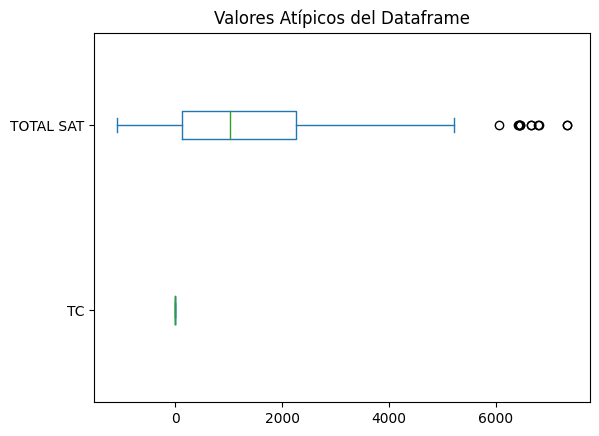

In [96]:
fig = plt.figure(figsize =(15, 8))
Datos_limpios3.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()